In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

We know that $\vec{F}=q(\vec{E}+\vec{v} \times \vec{B})$ and so

$$\ddot{\vec{r}}=\frac{q}{m}(\vec{E}+\vec{v} \times \vec{B})$$

If $\vec{E}=E_0\cos(kz-\omega t)\hat{x}$ and $\vec{B}=\frac{E_0}{c}\cos(kz-\omega t) \hat{y}$ then we get the following system of ODES:

$$\ddot{x}=\frac{E_0 q}{m}\left(\cos(kz-\omega t)-\frac{\dot{z}}{c}\cos(kz-\omega t)\right) $$

$$\ddot{y}=0 $$

$$\ddot{z}=\frac{E_0q}{m}\frac{\dot{x}}{c} \cos(kz-\omega t)$$

Noting that $c=\frac{k}{\omega}$ we can write

$$\cos(kz-\omega t)=\cos(k(z-ct)) $$

Instead of solving $x$, $y$ and $z$ as a function of $t$. Lets solve them for a function of $ct$. With the dots now representing derivatives with repsect to $ct$ we now have

$$\ddot{x}=\left(\frac{E_0 q}{mc^2} \right)(1-\dot{z})\cos(k(z-ct)) $$

$$\ddot{y}=0$$
 
$$\ddot{z}=\left(\frac{E_0 q}{mc^2} \right)\dot{x}\cos(k(z-ct)) $$

In [36]:
def elec_motion(S, t):
    x, vx, z, vz = S
    dSdt =  [vx, 
             (1-vz)*np.cos(z-t),
             vz,
             vx*np.cos(z-t)]
    return dSdt

In [41]:
S0 = [0,0,0,0]

t = np.linspace(0, 1000*np.pi, 10000)
sol = odeint(elec_motion, S0, t)

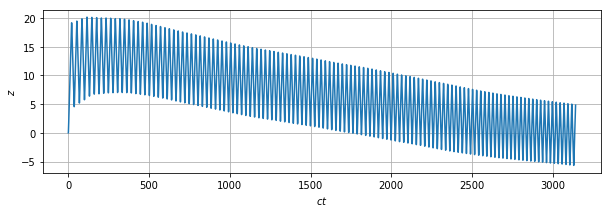

In [50]:
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(t,sol[:,0])
ax.set_xlabel('$ct$')
ax.set_ylabel('$z$')

ax.grid()

plt.show()

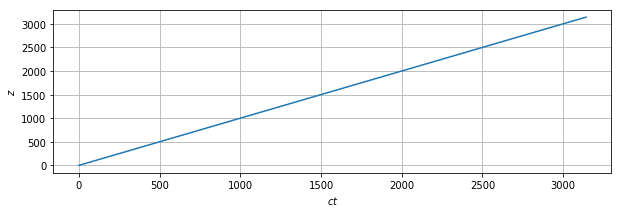

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(t,sol[:,2])
ax.set_xlabel('$ct$')
ax.set_ylabel('$z$')
ax.grid()

plt.show()